In [17]:
import os
path = r'C:\Users\harik\OneDrive\Documents\Python\BTP\Densenet'

os.mkdir(path)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\harik\\OneDrive\\Documents\\Python\\BTP\\Densenet'

In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12332217331364732129
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4183621632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4660715337123587596
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
os.chdir(r'C:\Users\harik\OneDrive\Documents\Projects\BTP\1907French-etal-SDLE-EL-ImageDataSet-forML')
filenames = os.listdir("train_test/c0")
print(filenames)
categories_train = []
filenamefin_train = []
for filename in filenames:
      categories_train.append("0")
      filenamefin_train.append(filename)
filenames = os.listdir("train_test/c1")


for filename in filenames:
    categories_train.append("1")
    filenamefin_train.append(filename)

filenames = os.listdir("train_test/c2")
for filename in filenames:
    categories_train.append("2")
    filenamefin_train.append(filename)

    
filenames = os.listdir("train_test/c3")
for filename in filenames:
    categories_train.append("3")
    filenamefin_train.append(filename)

filenames = os.listdir("train_test/c4")
for filename in filenames:
    categories_train.append("4")
    filenamefin_train.append(filename)
  
df = pd.DataFrame({'filename': filenamefin_train,'category': categories_train})
df.shape

['A1-DH3000-3000h-PT-cell1.jpg', 'A1-DH3000-3000h-PT-cell10.jpg', 'A1-DH3000-3000h-PT-cell11.jpg', 'A1-DH3000-3000h-PT-cell12.jpg', 'A1-DH3000-3000h-PT-cell13.jpg', 'A1-DH3000-3000h-PT-cell14.jpg', 'A1-DH3000-3000h-PT-cell15.jpg', 'A1-DH3000-3000h-PT-cell16.jpg', 'A1-DH3000-3000h-PT-cell17.jpg', 'A1-DH3000-3000h-PT-cell18.jpg', 'A1-DH3000-3000h-PT-cell19.jpg', 'A1-DH3000-3000h-PT-cell2.jpg', 'A1-DH3000-3000h-PT-cell20.jpg', 'A1-DH3000-3000h-PT-cell21.jpg', 'A1-DH3000-3000h-PT-cell22.jpg', 'A1-DH3000-3000h-PT-cell24.jpg', 'A1-DH3000-3000h-PT-cell25.jpg', 'A1-DH3000-3000h-PT-cell26.jpg', 'A1-DH3000-3000h-PT-cell27.jpg', 'A1-DH3000-3000h-PT-cell28.jpg', 'A1-DH3000-3000h-PT-cell29.jpg', 'A1-DH3000-3000h-PT-cell3.jpg', 'A1-DH3000-3000h-PT-cell30.jpg', 'A1-DH3000-3000h-PT-cell31.jpg', 'A1-DH3000-3000h-PT-cell32.jpg', 'A1-DH3000-3000h-PT-cell33.jpg', 'A1-DH3000-3000h-PT-cell34.jpg', 'A1-DH3000-3000h-PT-cell36.jpg', 'A1-DH3000-3000h-PT-cell37.jpg', 'A1-DH3000-3000h-PT-cell38.jpg', 'A1-DH3000-3

(3223, 2)

In [4]:
X = df['filename']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [5]:
train_df = pd.DataFrame({'filename': X_train,'category': y_train})
test_df = pd.DataFrame({'filename': X_test, 'category': y_test})

['1']


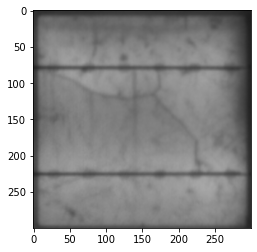

In [6]:
sample = random.choice(X)
orders = df.loc[df.filename == sample, 'category'].unique()
print(orders)
if orders == '0':
  image = load_img("train/c0/" + sample)
elif orders == '1':
  image = load_img("train/c1/" + sample)
elif orders == '2':
  image = load_img("train/c2/" + sample)
elif orders == '3':
  image = load_img("train/c3/" + sample)
elif orders == '4':
  image = load_img("train/c4/" + sample)
plt.imshow(image)

In [7]:
df['category'].value_counts(sort = False)

0     190
1     271
2    1866
3     187
4     709
Name: category, dtype: int64

In [8]:
total_train = train_df.shape[0]
batch_size=16
IMAGE_SIZE=(150,150)

In [9]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "train_test_set", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2578 validated image filenames belonging to 5 classes.


In [10]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "train_test_set", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle = False
)

Found 645 validated image filenames belonging to 5 classes.


In [11]:
model_vgg19= tf.keras.applications.DenseNet121(weights="imagenet", include_top=False, input_shape = (150,150,3))
print(model_vgg19.summary())

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

__________________________________________________________________________________________________
conv4_block10_0_bn (BatchNormal (None, 9, 9, 544)    2176        conv4_block9_concat[0][0]        
__________________________________________________________________________________________________
conv4_block10_0_relu (Activatio (None, 9, 9, 544)    0           conv4_block10_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_block10_1_conv (Conv2D)   (None, 9, 9, 128)    69632       conv4_block10_0_relu[0][0]       
__________________________________________________________________________________________________
conv4_block10_1_bn (BatchNormal (None, 9, 9, 128)    512         conv4_block10_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block10_1_relu (Activatio (None, 9, 9, 128)    0           conv4_block10_1_bn[0][0]         
__________

Total params: 7,037,504
Trainable params: 6,953,856
Non-trainable params: 83,648
__________________________________________________________________________________________________
None


In [12]:
i = 0
for layer in model_vgg19.layers[:]:
    if(i%2 == 0):
        layer.trainable = False
    i = i+1
for layer in model_vgg19.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000021E32CCA940> False
<keras.layers.convolutional.ZeroPadding2D object at 0x0000021E32D25490> True
<keras.layers.convolutional.Conv2D object at 0x0000021E32D25820> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000021E32EFC9A0> True
<keras.layers.core.Activation object at 0x0000021E32CB80D0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x0000021E32EFC280> True
<keras.layers.pooling.MaxPooling2D object at 0x0000021E330E10A0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000021E330E1A30> True
<keras.layers.core.Activation object at 0x0000021E330D58B0> False
<keras.layers.convolutional.Conv2D object at 0x0000021E330EFA90> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000021E330F4C40> False
<keras.layers.core.Activation object at 0x0000021E330F4970> True
<keras.layers.convolutional.Conv2D object at 0x0000021E33

<keras.layers.core.Activation object at 0x0000021E4C17A730> False
<keras.layers.convolutional.Conv2D object at 0x0000021E4C16EEE0> True
<keras.layers.merge.Concatenate object at 0x0000021E4DBE1760> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000021E4DBFC430> True
<keras.layers.core.Activation object at 0x0000021E4C17A8E0> False
<keras.layers.convolutional.Conv2D object at 0x0000021E4DBF4D30> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000021E4DBF40A0> False
<keras.layers.core.Activation object at 0x0000021E4DC038E0> True
<keras.layers.convolutional.Conv2D object at 0x0000021E4DC037F0> False
<keras.layers.merge.Concatenate object at 0x0000021E4DC0A100> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x0000021E53613250> False
<keras.layers.core.Activation object at 0x0000021E536139D0> True
<keras.layers.convolutional.Conv2D object at 0x0000021E4DC0F670> False
<keras.layers

In [13]:
# Create the model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
new_model = Sequential()
# Add the vgg convolutional base model

new_model.add(model_vgg19)

new_model.add(Flatten())
new_model.add(Dense(64, activation='relu'))
new_model.add(tensorflow.keras.layers.Dropout(0.5))
new_model.add(Dense(5, activation='softmax'))
# Show a summary of the new_model. Check the number of trainable parameters

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1048640   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 8,086,469
Trainable params: 4,807,813
Non-trainable params: 3,278,656
_________________________________________________________________


In [14]:
new_model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1048640   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 8,086,469
Trainable params: 4,807,813
Non-trainable params: 3,278,656
_________________________________________________________________


In [15]:
history = new_model.fit(train_generator, epochs=50)

Epoch 1/50
162/162 [==============================] - 95s 319ms/step - loss: 0.6909 - accuracy: 0.7746
Epoch 2/50
162/162 [==============================] - 20s 120ms/step - loss: 0.3552 - accuracy: 0.8817
Epoch 3/50
162/162 [==============================] - 20s 125ms/step - loss: 0.2782 - accuracy: 0.9092
Epoch 4/50
162/162 [==============================] - 23s 141ms/step - loss: 0.2462 - accuracy: 0.9213
Epoch 5/50
162/162 [==============================] - 19s 117ms/step - loss: 0.2289 - accuracy: 0.9279
Epoch 6/50
162/162 [==============================] - 20s 121ms/step - loss: 0.2294 - accuracy: 0.9267
Epoch 7/50
162/162 [==============================] - 20s 122ms/step - loss: 0.2274 - accuracy: 0.9213s - loss: 0.2
Epoch 8/50
162/162 [==============================] - 20s 125ms/step - loss: 0.2189 - accuracy: 0.9310
Epoch 9/50
162/162 [==============================] - 22s 137ms/step - loss: 0.1737 - accuracy: 0.9418
Epoch 10/50
162/162 [==============================] - 23s 1

In [18]:
file1 = open(os.path.join(path, 'info.txt'),"a")
print(new_model.evaluate(test_generator), '\n', file = file1)
file1.close()
predictions = new_model.predict(test_generator)

41/41 [==============================] - 13s 257ms/step - loss: 0.0561 - accuracy: 0.9829


50


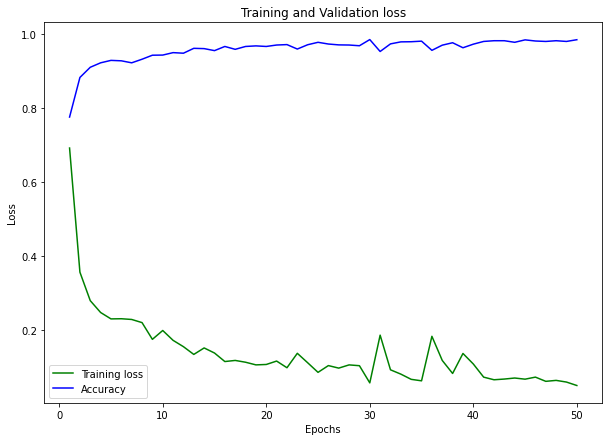

In [19]:
loss_train = history.history['loss']
loss_val = history.history['accuracy']
fig = plt.figure(figsize=(10, 7))
epochs = range(1,51)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(path, 'Loss.png'), dpi = 100)
plt.show()

In [20]:
def process_images(n):
    t = test_df.iloc[n]
    sample = t.filename
    orders = t.category
    image = load_img("train_test_set/" + sample)
    return ord(orders), predictions[n].argmax(), image

In [21]:
s = predictions.shape
pred = np.zeros((5, 5))
lis = []
for i in range(1, s[0]):
  tr1, pr1, img = process_images(i)
  tr1 = tr1 - 48
  if(tr1 != pr1):
    lis.append(img)
    #print(pr1, tr1)
  pred[pr1, tr1] = pred[pr1, tr1] + 1
pred_true = pd.DataFrame(pred)
pred_true.head()

,0,1,2,3,4
0,38.0,0.0,0.0,0.0,0.0
1,0.0,47.0,4.0,0.0,0.0
2,0.0,6.0,370.0,0.0,0.0
3,0.0,0.0,0.0,36.0,0.0
4,0.0,0.0,0.0,1.0,142.0


In [22]:
model_json = new_model.to_json()
with open(os.path.join(path, 'model.json'), "w") as json_file:
    json_file.write(model_json)
new_model.save_weights(os.path.join(path, 'model.h5'))
print("Saved model to disk")

Saved model to disk


In [23]:
hist_df = pd.DataFrame(history.history)
hist_df.to_csv(os.path.join(path, 'history.csv'))
    
file1 = open(os.path.join(path, 'info.txt'),"a")
file1.write("Learning rate = 0.0001 train test split = 0.20 loss = categorical cross entropy optimizer = adam")
file1.close()

pred_true.to_csv(os.path.join(path, 'Pred_true.csv'))

## Extras